In [29]:
import numpy as np
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

In [7]:
digits = load_digits()
input = digits.data
output = digits.target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= digits.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device) # 32비트의 부동소수점
y_train = torch.LongTensor(y_train).to(device) # 64비트의 부호있는 정수
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([1257, 64])
torch.Size([1257])
torch.Size([540, 64])
torch.Size([540])


In [15]:
print(x_train[0])
print(y_train[0])

tensor([ 0.,  0.,  0., 16., 12.,  1.,  0.,  0.,  0.,  0.,  6., 16., 14.,  7.,
         0.,  0.,  0.,  0., 14., 15.,  1., 11.,  0.,  0.,  0.,  0., 16., 15.,
         0., 14.,  1.,  0.,  0.,  1., 16., 10.,  0., 14.,  2.,  0.,  0.,  0.,
        15., 13.,  3., 15.,  3.,  0.,  0.,  0.,  9., 16., 16., 15.,  0.,  0.,
         0.,  0.,  0., 13., 16.,  8.,  0.,  0.])
tensor(0)


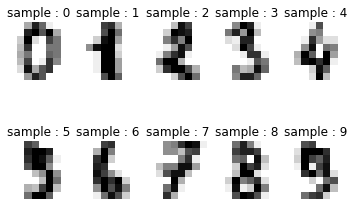

In [23]:
images = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images[:10]):
  plt.subplot(2,5,index+1)
  plt.axis("off")
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
  plt.title("sample : %i" %label)

어쩔때 floattensor이고 long tensor인가,,? 그 차이가 의미가 있는가?

In [42]:
# input 64, output 1

model = nn.Sequential(
    nn.Linear(64, 32, bias=True),
    nn.Sigmoid(),
    nn.Linear(32,24, bias=True),
    nn.Sigmoid(),
    nn.Linear(24,10, bias=True),
    nn.Softmax()
).to(device)

In [43]:
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.7)

In [44]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 2.303715705871582
10 2.302907943725586
20 2.302151918411255
30 2.301527261734009
40 2.300947666168213
50 2.3003578186035156
60 2.299724817276001
70 2.299013376235962
80 2.2981841564178467
90 2.297240734100342


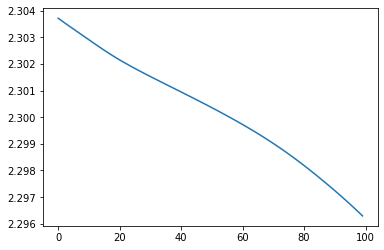

In [45]:
plt.plot(losses)
plt.show()

In [46]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

  print(y_pred[0])
  print(predicted[0])
  print(accuracy)

[0.13602696 0.11319835 0.10272977 0.06705049 0.05894302 0.11950292
 0.14288208 0.07395896 0.09705275 0.08865473]
6
0.16666666666666666


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
